# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Datasets

In [24]:
train = pd.read_csv(r"C:\Users\riyap\Downloads\train_ctrUa4K.csv")

test = pd.read_csv(r"C:\Users\riyap\Downloads\test_lAUu6dG.csv")
test


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Analysis

In [47]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}, xlabel='1/2/3+', ylabel='count'>

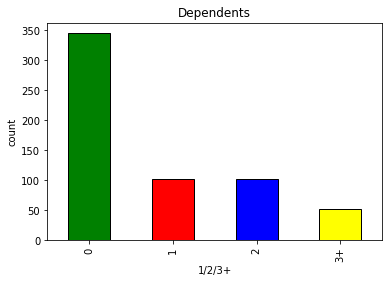

In [4]:
plt.title('Dependents')
plt.xlabel('1/2/3+')
plt.ylabel('count')
train['Dependents'].value_counts().plot.bar(color=['green','red','blue','yellow'], edgecolor='black')

# categorical


<AxesSubplot:title={'center':'loan status'}>

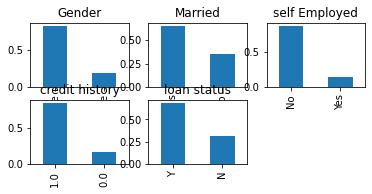

In [5]:
plt.figure(1)
plt.subplot(331)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(332)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(333)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='self Employed')
plt.subplot(334)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="credit history")
plt.subplot(335)
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='loan status')

# Ordinal

<AxesSubplot:title={'center':'property area'}>

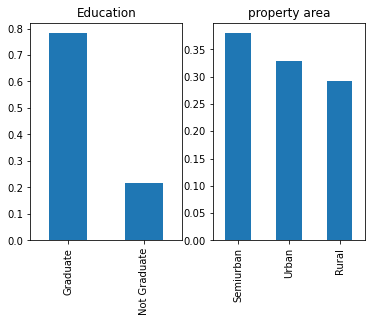

In [6]:
plt.figure(2)
plt.subplot(121)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='property area')

# Independent Numerical value

<AxesSubplot:title={'center':'Applicant Income analysis'}>

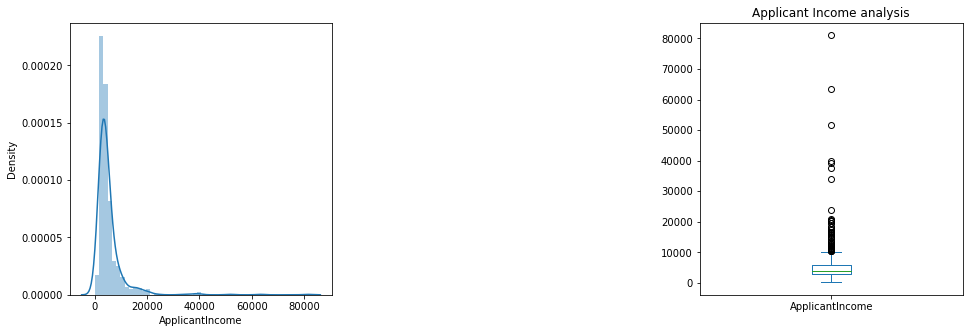

In [7]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'], label='Applicant Income Analysis')
plt.subplot(133)
train['ApplicantIncome'].plot(kind='box',figsize=(16,5),title="Applicant Income analysis")



Text(0.5, 0.98, '')

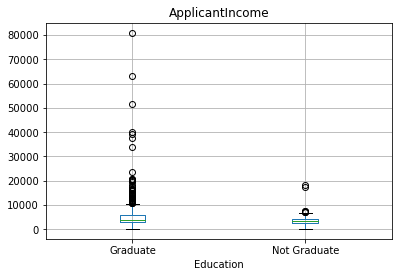

In [8]:
train.boxplot(column ='ApplicantIncome', by = 'Education')
plt.suptitle('')

## Bivariate Analysis

Categorical independent variable vs Target variable

In [9]:
train['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [10]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [11]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

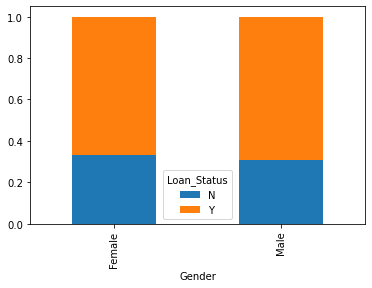

In [12]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Married'>

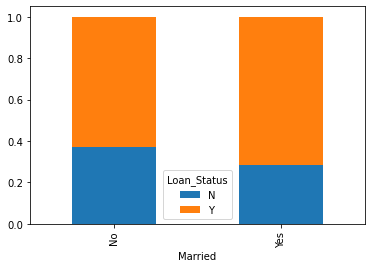

In [13]:
Married=pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Property_Area'>

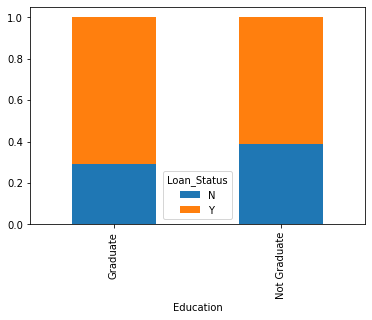

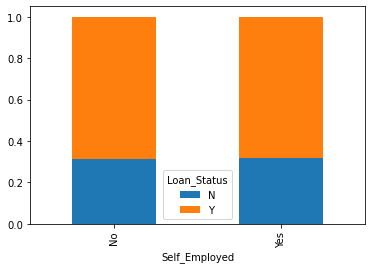

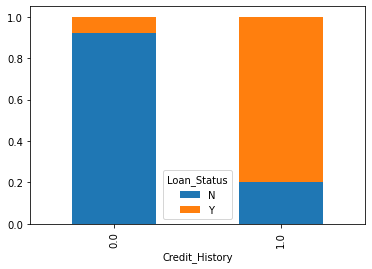

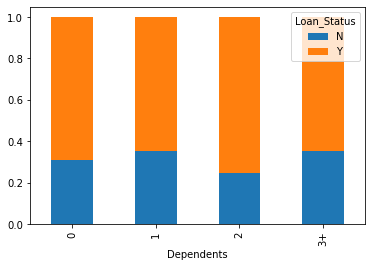

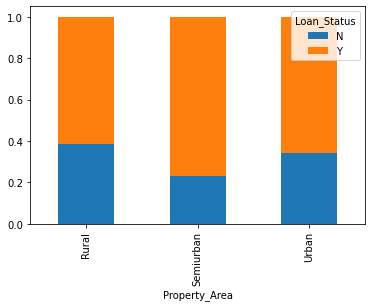

In [14]:
Education=pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
Self_Employed=pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
Credit_History=pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
Dependents=pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
Property_Area=pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

<AxesSubplot:title={'center':'Loan status wrt Income'}, xlabel='Loan_Status'>

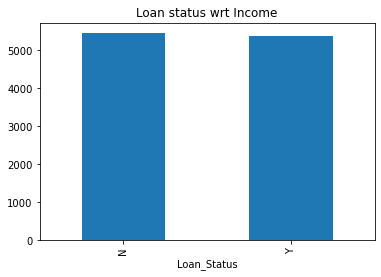

In [15]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar', title='Loan status wrt Income')

Since the aboce plot doesn't have big difference, separate it into bins

In [16]:
bins= [0,2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin']= pd.cut(train['ApplicantIncome'], bins, labels=group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Text(0, 0.5, 'Percentage')

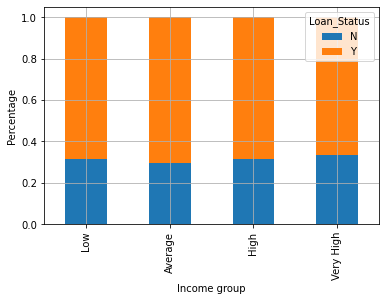

In [17]:
Income_bin=pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, grid=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

Inference: Applicant's Income doesn't affect Loan status

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,C_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


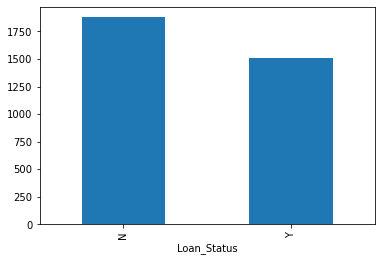

In [18]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot(kind='bar')
bins= [0,1000, 3000, 43000]
group = ['Low', 'Average', 'High']
train['C_Income_bin']= pd.cut(train['CoapplicantIncome'], bins, labels=group)
train.head()

Text(0, 0.5, 'Percentage')

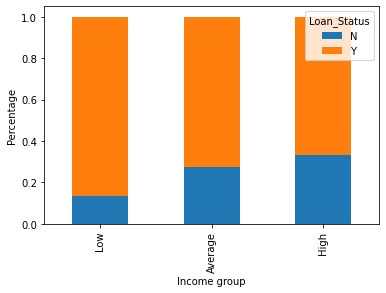

In [19]:
C_Income_bin=pd.crosstab(train['C_Income_bin'], train['Loan_Status'])
C_Income_bin.div(C_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

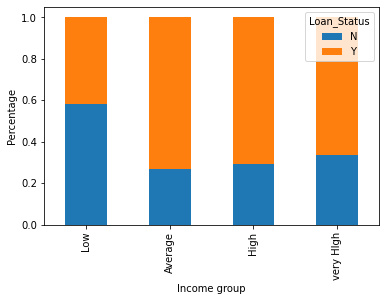

In [20]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins= [0,2500, 4000,6000,8100]
group = ['Low', 'Average', 'High','very HIgh']
train['total_Income_bin']= pd.cut(train['total_income'], bins, labels=group)
train.head()
total_Income_bin=pd.crosstab(train['total_Income_bin'], train['Loan_Status'])
total_Income_bin.div(total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

<AxesSubplot:xlabel='Loan_Status'>

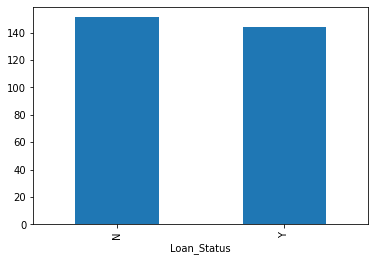

In [21]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot(kind='bar')

In [22]:
train["LoanAmount"]

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

Text(0, 0.5, 'Percentage')

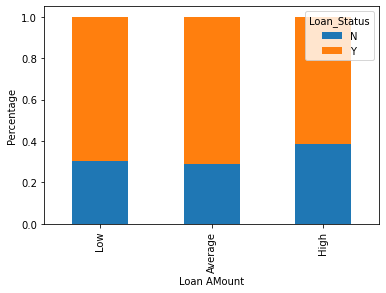

In [23]:
bins= [0,100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'], bins, labels=group)
train.head()
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan AMount')
plt.ylabel('Percentage')

In [44]:
train.drop(['Income_bin', 'C_Income_bin', 'total_income', 'total_Income_bin',
       'LoanAmount_bin'], axis=1)

KeyError: "['Income_bin' 'C_Income_bin' 'total_Income_bin' 'LoanAmount_bin'] not found in axis"

In [25]:
train['Dependents'].replace('3+', 3, inplace=  True)
test['Dependents'].replace('3+', 3, inplace=  True)
train['Loan_Status'].replace('Y', 1, inplace = True)

train['Loan_Status'].replace('N', 0, inplace = True)




In [26]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [28]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


<AxesSubplot:>

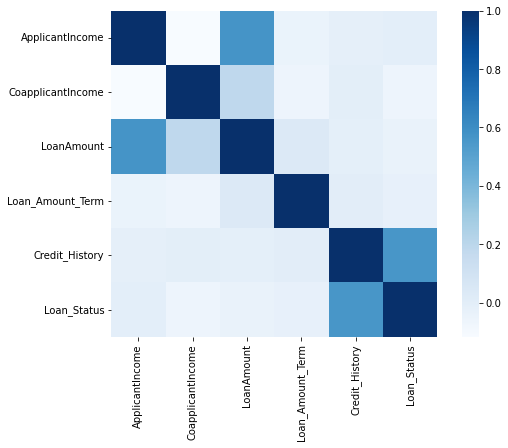

In [29]:
matrix = train.corr()
a, b = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax = 1, square= True, cmap ='Blues')

Check for Null values

In [30]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Fill Mean/ Median for numerical values.
Fill mode value for categorical values.

In [31]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True )
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True )
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True )
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True )
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True )
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True )
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True )
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True )
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [32]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
train['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True )

In [34]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [36]:
train['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True )

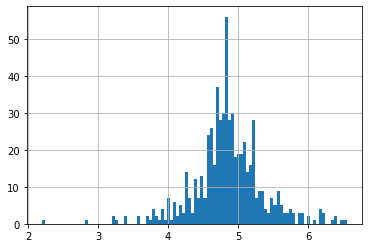

In [37]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=100)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [38]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1,4.836282
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


# Model Building - Logistic Regression

In [12]:
train1 = train.drop('Loan_ID', axis=1)
test1 = test.drop('Loan_ID', axis=1)


In [37]:
x =train1.drop('Loan_Status', axis=1)
y = train1['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [65]:
train1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,4.836282,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [64]:
x = pd.get_dummies(x)
train1  = pd.get_dummies(train1)
test1 =  pd.get_dummies(test1)
train1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,4.836282,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_val

509    1
439    1
240    1
380    1
438    0
      ..
145    1
486    0
504    1
72     1
526    1
Name: Loan_Status, Length: 185, dtype: int64

In [32]:
pred_val = model.predict(x_val)
accuracy_score(y_val, pred_val)

0.8108108108108109

In [39]:
pred_test = model.predict(test1)


In [66]:
submission=pd.read_csv(r"C:\Users\riyap\Downloads\sample_submission_49d68Cx.csv")

In [67]:
test_original = pd.read_csv(r'C:\Users\riyap\Downloads\test_lAUu6dG.csv')
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [68]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=('Loan_ID', 'Loan_Status')).to_csv('Results.csv', index=False)

 # Model Building - Neural Network


In [39]:
train_n = train.drop('Loan_ID', axis=1)
test_n = test.drop('Loan_ID', axis=1)


In [40]:
train_n

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1,4.836282
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [41]:
X = train_n.drop('Loan_Status', axis=1)
Y = train_n['Loan_Status']

In [42]:
X =pd.get_dummies(X)
train_n  = pd.get_dummies(train_n)
test_n =  pd.get_dummies(test_n)
train_n

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,126.0,360.0,1.0,1,4.836282,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [43]:
for i in train_n.columns[1:]:
    train_n[i] = (train_n[i] - train_n[i].min()) / (train_n[i].max() - train_n[i].min())
    
    

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y )
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
139,4200,1430.0,129.0,360.0,1.0,4.859812,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
213,5703,0.0,130.0,360.0,1.0,4.867534,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0
577,3229,2739.0,110.0,360.0,1.0,4.700480,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
181,1916,5063.0,67.0,360.0,1.0,4.204693,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
19,2600,3500.0,115.0,360.0,1.0,4.744932,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,3692,0.0,93.0,360.0,1.0,4.532599,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
256,6045,0.0,115.0,360.0,0.0,4.744932,0,1,1,0,...,1,0,0,0,1,1,0,1,0,0
355,3813,0.0,116.0,180.0,1.0,4.753590,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
447,3539,1376.0,55.0,360.0,1.0,4.007333,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0


In [45]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [86]:
input_neuron = x_train.shape[1]
output_neuron = 1
no_of_hidden = 3
hidden1= 10
hidden2= 5
hidden3=2
type(input_neuron)

int

In [87]:
model = Sequential()
model.add(InputLayer(input_shape=x_train.shape[1]))
model.add(Dense(units = hidden1, activation = 'tanh'))
model.add(Dense(units = hidden2, activation = 'relu'))
#model.add(Dense(units=hidden3, activation='relu'))
model.add(Dense(units = output_neuron, activation='sigmoid'))

In [88]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [89]:
model_history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 4ms/step - loss: 0.7717 - accuracy: 0.3963
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7258 - accuracy: 0.5175
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.5991
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.6061
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.6107
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.6340
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6737
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.6713
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.6946
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.6946
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7016
Epoch 84/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7016
Epoch 85/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.7016
Epoch 86/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6128 - accuracy: 0.7016
Epoch 87/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.7016
Epoch 88/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7016
Epoch 89/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7016
Epoch 90/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6117 - accuracy: 0.7016
Epoch 91/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7016
Epoch 92/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.7016
Epoch 93/100


In [90]:
prediction = model.predict_classes(x_test)

In [91]:
from sklearn.metrics import accuracy_score
print('accuracy Score: {}'.format(accuracy_score(prediction, y_test)))

accuracy Score: 0.6972972972972973


In [65]:
prediction_test = model.predict(test_n)

In [66]:
submission=pd.read_csv(r"C:\Users\riyap\Downloads\sample_submission_49d68Cx.csv")

In [84]:
test_original = pd.read_csv(r'C:\Users\riyap\Downloads\test_lAUu6dG.csv')
submission['Loan_Status']=prediction_test
submission['Loan_ID']=test_original['Loan_ID']

In [85]:
submission

,Loan_ID,Loan_Status
0,LP001015,0.849092
1,LP001022,0.814017
2,LP001031,0.844018
3,LP001035,0.835710
4,LP001051,0.778933
...,...,...
362,LP002971,0.830655
363,LP002975,0.827255
364,LP002980,0.817600
365,LP002986,0.850451


In [88]:
submission['Loan_Status'] = round(submission['Loan_Status'])
submission

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
...,...,...
362,LP002971,1.0
363,LP002975,1.0
364,LP002980,1.0
365,LP002986,1.0


In [89]:
submission['Loan_Status'].replace(0.0, 'N', inplace= True)
submission['Loan_Status'].replace(1.0, 'Y', inplace=True)

In [90]:
submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [92]:
pd.DataFrame(submission, columns=('Loan_ID', 'Loan_Status')).to_csv('Results_nn.csv', index=False)